<a href="https://colab.research.google.com/github/srishagorasa1/Social-Media-Analytics/blob/main/PanasonicLCDTV_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Social Media Analytics - Panasonic Sales Analysis

In [22]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [24]:
#Read the Data from Excel
df = pd.read_excel("HW PanasonicLCDTV.xlsx",header=1)
df.head()

,Manufacturer,Screen Size,Pixel,Motion Rate,Overall Rating,Video Quality,Sound quality,Appearance,Number of Features,Ease of Set up,Life Span,Expert Overall Rating,"size=26""","size=32""","size=36""","size=40""","size=42""","size=46""","size=49""","size=52""","size=55""","size=60""",Pixel=120,Pixel=240,Pixel=600,MotionRate=1080,Selling Price,Yearly units sold in US
0,LG,19,60,720,3.71,3.34,4.12,3.61,4.33,3.38,2.99,3.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,430,16041
1,LG,19,60,1080,3.66,3.30,4.07,4.12,4.55,4.08,3.04,3.42,0,0,0,0,0,0,0,0,0,0,0,0,0,1,535,16364
2,LG,19,120,720,3.72,3.38,4.37,4.07,4.11,3.40,3.13,3.77,0,0,0,0,0,0,0,0,0,0,1,0,0,0,495,15998
3,LG,19,120,1080,3.71,3.37,4.16,4.25,4.14,3.37,3.29,3.56,0,0,0,0,0,0,0,0,0,0,1,0,0,1,540,16214
4,LG,19,240,720,3.62,3.54,4.57,4.10,4.23,3.76,3.13,4.06,0,0,0,0,0,0,0,0,0,0,0,1,0,0,545,16343


In [25]:
#Dropping the categorical variables as we already have created dummy variables for them.
df.drop(['Screen Size', 'Pixel', 'Motion Rate'], axis = 1, inplace=True)

 Here, the goal variable(y) is Yearly Units sold




In [27]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

**We need to figure out where Panasonic stands in each feature as compared to their competitors.**

After averaging the user rating over each feature for Panasonic and its competitors, we can see that Panasonic does rank higher in Ease of Setup, Life Span and Video Quality.

In [28]:
pivot_tbl = df.pivot_table(['Video Quality','Sound quality', 'Appearance', 'Number of Features', 'Ease of Set up', 'Life Span'], ['Manufacturer'], aggfunc='mean')
pivot_tbl

,Appearance,Ease of Set up,Life Span,Number of Features,Sound quality,Video Quality
Manufacturer,,,,,,
LG,3.971932,3.601591,3.100909,4.225341,4.209659,3.415795
Panasonic,3.586818,4.211136,4.637045,3.814205,3.503295,4.378523
Philips,4.025114,3.209659,3.595909,2.903636,3.889773,3.391364
Samsung,4.220114,3.883636,4.491136,4.378636,4.204205,4.131591
Sharp,3.461023,3.191705,3.382955,3.361136,3.633750,3.572159
Sony,3.964659,3.728977,4.102045,3.236818,4.081591,3.906250
Toshiba,3.482841,3.403409,3.509318,3.433636,3.110114,3.056818
Vizio,3.127045,3.400795,3.542273,3.154205,2.992386,3.104205


In [29]:
#Display Panasonic's rank wrt to their competitor
print("Panasonic's Rank in each feature relative to its competitors")
pivot_tbl.rank(ascending=False)

Panasonic's Rank in each feature relative to its competitors


,Appearance,Ease of Set up,Life Span,Number of Features,Sound quality,Video Quality
Manufacturer,,,,,,
LG,3.0,4.0,8.0,2.0,1.0,5.0
Panasonic,5.0,1.0,1.0,3.0,6.0,1.0
Philips,2.0,7.0,4.0,8.0,4.0,6.0
Samsung,1.0,2.0,2.0,1.0,2.0,2.0
Sharp,7.0,8.0,7.0,5.0,5.0,4.0
Sony,4.0,3.0,3.0,6.0,3.0,3.0
Toshiba,6.0,5.0,6.0,4.0,7.0,8.0
Vizio,8.0,6.0,5.0,7.0,8.0,7.0


Panasonic is best ranked among all brand in Ease of Set Up, Life Span and Video Quality.



*   **Panasonic ranks third in Number of Features.**
*   **However, Panasoic ranks fifth in Appearance, sixth in Sound Quality. There is a scope of improvement in these two features.**



Before, we take a call on whether the business should invest more resources in improving average rating for these two features, we need to check the significance of Appearance and Sound Quality on total number of sales.

If the features are found to be highly significant towards overall sales(as compared to other features), more investments in them can improve the sales figure.

# **Regression Analysis to find the most significant features for yearly sales**

Let's start by building a OLS Regression with 'Yearly Units sold in US' as the goal varaible and all other variables are the independent variables.

In [34]:
import statsmodels.api as sm
#X = np.append(arr = np.ones((704,1)).astype(int), values = X, axis = 1)
X['Intercept'] = pd.DataFrame(np.ones((704,1),dtype='int'))
#X.head()
#X = X.assign(e=Series(np.ones((704,1)).astype(int)).values)
regressor_OLS = sm.OLS(endog=y, exog=X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Yearly units sold in US   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 3.147e+05
Date:                     Tue, 18 May 2021   Prob (F-statistic):               0.00
Time:                             08:00:14   Log-Likelihood:                -3728.3
No. Observations:                      704   AIC:                             7505.
Df Residuals:                          680   BIC:                             7614.
Df Model:                               23                                         
Covariance Type:                 nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Overall Rating          129.8666      6.152     21.108      0.000     117.787     141.947
Video Quality           590.4260      6.633     89.012      0.000     577.402     603.450
Sound quality            59.2385      5.459     10.851      0.000      48.519      69.957
Appearance              212.5589      5.652     37.610      0.000     201.462     223.656
Number of Features      435.9875      3.639    119.804      0.000     428.842     443.133
Ease of Set up          312.6551      5.515     56.691      0.000     301.827     323.484
Life Span               116.5273      5.731     20.333      0.000     105.275     127.780
Expert Overall Rating    28.4796      6.347      4.487      0.000      16.018      40.941
size=26"               1007.4753      9.097    110.743      0.000     989.613    1025.338
size=32"               2002.1033     10.966    182.570      0.000    1980.572    2023.635
size=36"               6016.6029     13.026    461.906      0.000    5991.028    6042.178
size=40"               1012.3222     16.007     63.243      0.000     980.894    1043.751
size=42"               8016.8643     19.026    421.357      0.000    7979.507    8054.222
size=46"               1.252e+04     22.670    552.467      0.000    1.25e+04    1.26e+04
size=49"               -480.4490     25.626    -18.749      0.000    -530.764    -430.133
size=52"              -1029.1550     29.289    -35.138      0.000   -1086.663    -971.647
size=55"              -1892.5467     32.507    -58.219      0.000   -1956.374   -1828.720
size=60"              -4978.4248     36.141   -137.752      0.000   -5049.385   -4907.464
Pixel=120               100.6476      5.878     17.122      0.000      89.106     112.189
Pixel=240               203.6658      7.760     26.247      0.000     188.430     218.901
Pixel=600               303.8723      9.921     30.631      0.000     284.394     323.351
MotionRate=1080         355.9644      5.548     64.159      0.000     345.071     366.858
Selling Price            -3.0492      0.058    -52.365      0.000      -3.164      -2.935
Intercept              1.048e+04     24.732    423.747      0.000    1.04e+04    1.05e+04
==============================================================================
Omnibus:                        0.493   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.383
Skew:                          -0.048   Prob(JB):                        0.826
Kurtosis:                       3.063   Cond. No.                     3.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition num

Looking at the above regression result, we can prioritize in the below order:


*   Video Quality
*   Number of Features
*   Ease of Setup
*   Appearance
*   Life Span
*   Sound Quality



Since, Panasonic is already No1 in Ease of Set Up, Life Span and Video Quality, we can look to improve the remaining features in below order.

*   Number of Features
*   Appearance
*   Sound Quality

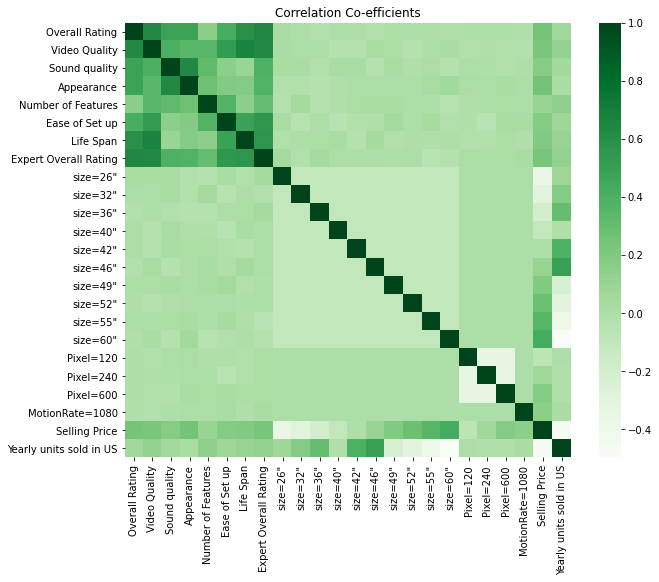

In [37]:
corr_mat = df.corr(method='spearman')
g = sns.heatmap(corr_mat, cmap='Greens')
g.set_title("Correlation Co-efficients")
plt.show()

# Adding Price Difference
**We have used Price diff as an independent (exploratory) variable to account for the effect of competition among manufacturers.**

Price diff is the difference between the focal product's price and the average price for that segment, where segment is defined by the combination of product aspects (Screen Size, Pixel, and Motion Rate).

Let's read the data from Excel. We need to read the data again as we need the product aspects. Earlier, we had converted product aspects into dummy variables. Therefore, we need to re-read the product aspect data, group the data by product aspects and find the price difference

In [45]:
#Read the Data from Excel
df1 = pd.read_excel("HW PanasonicLCDTV.xlsx",header=1)

In [46]:
df1['GroupMeanPrice']= df1.groupby(by=['Screen Size', 'Pixel', 'Motion Rate'])[['Selling Price']].transform('mean')

In [47]:
df1['Price Diff'] = df1['Selling Price'] - df1['GroupMeanPrice']
df1.head()

,Manufacturer,Screen Size,Pixel,Motion Rate,Overall Rating,Video Quality,Sound quality,Appearance,Number of Features,Ease of Set up,Life Span,Expert Overall Rating,"size=26""","size=32""","size=36""","size=40""","size=42""","size=46""","size=49""","size=52""","size=55""","size=60""",Pixel=120,Pixel=240,Pixel=600,MotionRate=1080,Selling Price,Yearly units sold in US,GroupMeanPrice,Price Diff
0,LG,19,60,720,3.71,3.34,4.12,3.61,4.33,3.38,2.99,3.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,430,16041,438.750,-8.750
1,LG,19,60,1080,3.66,3.30,4.07,4.12,4.55,4.08,3.04,3.42,0,0,0,0,0,0,0,0,0,0,0,0,0,1,535,16364,528.750,6.250
2,LG,19,120,720,3.72,3.38,4.37,4.07,4.11,3.40,3.13,3.77,0,0,0,0,0,0,0,0,0,0,1,0,0,0,495,15998,490.625,4.375
3,LG,19,120,1080,3.71,3.37,4.16,4.25,4.14,3.37,3.29,3.56,0,0,0,0,0,0,0,0,0,0,1,0,0,1,540,16214,546.875,-6.875
4,LG,19,240,720,3.62,3.54,4.57,4.10,4.23,3.76,3.13,4.06,0,0,0,0,0,0,0,0,0,0,0,1,0,0,545,16343,553.750,-8.750


In [48]:
#Dropping the categorical variables as we already have created dummy variables for them.
#We can also drop the column for overall and average selling price of the groups.
df1.drop(['Screen Size', 'Pixel', 'Motion Rate', 'Selling Price' ,'GroupMeanPrice'],axis = 1, inplace=True)

In [49]:
df1.head()

,Manufacturer,Overall Rating,Video Quality,Sound quality,Appearance,Number of Features,Ease of Set up,Life Span,Expert Overall Rating,"size=26""","size=32""","size=36""","size=40""","size=42""","size=46""","size=49""","size=52""","size=55""","size=60""",Pixel=120,Pixel=240,Pixel=600,MotionRate=1080,Yearly units sold in US,Price Diff
0,LG,3.71,3.34,4.12,3.61,4.33,3.38,2.99,3.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16041,-8.750
1,LG,3.66,3.30,4.07,4.12,4.55,4.08,3.04,3.42,0,0,0,0,0,0,0,0,0,0,0,0,0,1,16364,6.250
2,LG,3.72,3.38,4.37,4.07,4.11,3.40,3.13,3.77,0,0,0,0,0,0,0,0,0,0,1,0,0,0,15998,4.375
3,LG,3.71,3.37,4.16,4.25,4.14,3.37,3.29,3.56,0,0,0,0,0,0,0,0,0,0,1,0,0,1,16214,-6.875
4,LG,3.62,3.54,4.57,4.10,4.23,3.76,3.13,4.06,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16343,-8.750


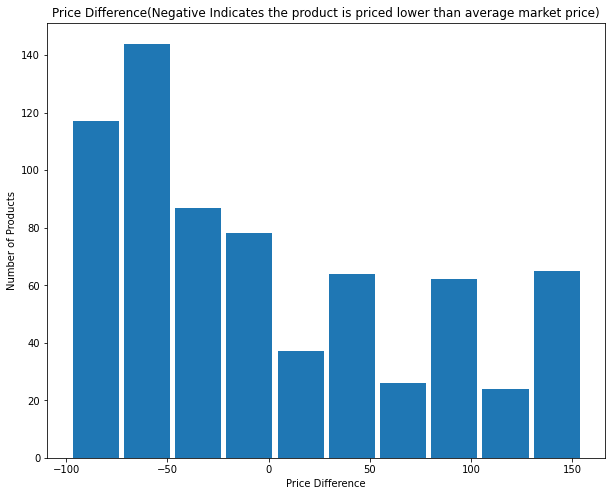

In [50]:
plt.hist(df1['Price Diff'], rwidth=0.9)
plt.xlabel('Price Difference')
plt.ylabel('Number of Products')
plt.title('Price Difference(Negative Indicates the product is priced lower than average market price)')
plt.show()

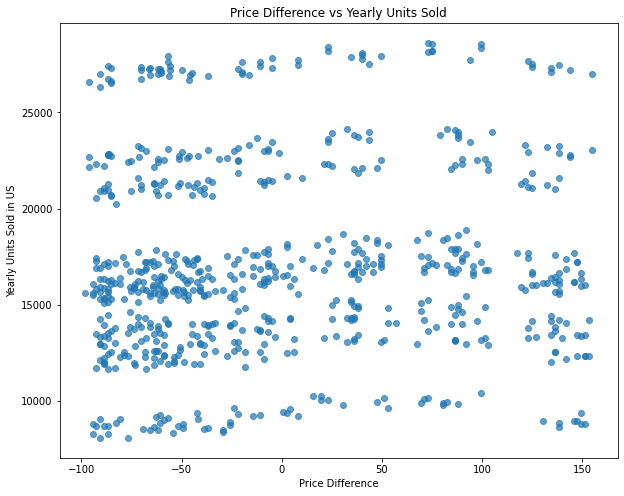

In [51]:
plt.scatter(df1['Price Diff'], df1['Yearly units sold in US'], alpha = 0.7)
plt.xlabel('Price Difference')
plt.ylabel('Yearly Units Sold in US')
plt.title('Price Difference vs Yearly Units Sold')
plt.show()

**We can see that as the price difference increases, units sold yearly decreases**

Positive price difference is indicative of the fact that the product is priced at a higher price as compared to the average market price.

In [53]:
X1 = df1[df1.columns.difference(['Manufacturer', 'Yearly units sold in US'])]
y1 = df1.iloc[:,-2]

Let's start by building a OLS Regression with 'Yearly Units sold in US' as the goal varaible and all other variables(inlucing the newly created 'Price Diff') are the independent variables.

In [55]:
import statsmodels.api as sm
#X = np.append(arr = np.ones((704,1)).astype(int), values = X, axis = 1)
X1['Intercept'] = pd.DataFrame(np.ones((704,1),dtype='int'))
#X1.head()
#X = X.assign(e=Series(np.ones((704,1)).astype(int)).values)
regressor_OLS = sm.OLS(endog=y1, exog=X1).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Yearly units sold in US   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 2.012e+05
Date:                     Tue, 18 May 2021   Prob (F-statistic):               0.00
Time:                             08:08:02   Log-Likelihood:                -3885.7
No. Observations:                      704   AIC:                             7819.
Df Residuals:                          680   BIC:                             7929.
Df Model:                               23                                         
Covariance Type:                 nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Appearance              214.7484      7.096     30.261      0.000     200.815     228.682
Ease of Set up          311.9369      6.899     45.218      0.000     298.392     325.482
Expert Overall Rating    20.4334      8.024      2.547      0.011       4.680      36.187
Life Span               116.5499      7.186     16.219      0.000     102.440     130.659
MotionRate=1080         136.5450      4.639     29.432      0.000     127.436     145.654
Number of Features      435.4757      4.553     95.654      0.000     426.537     444.414
Overall Rating          126.6985      7.720     16.412      0.000     111.541     141.856
Pixel=120               -42.8813      6.591     -6.507      0.000     -55.822     -29.941
Pixel=240               -98.6170      6.595    -14.954      0.000    -111.566     -85.669
Pixel=600              -141.8566      6.584    -21.547      0.000    -154.783    -128.930
Price Diff               -2.9745      0.077    -38.835      0.000      -3.125      -2.824
Sound quality            55.1150      6.850      8.046      0.000      41.666      68.564
Video Quality           592.0965      8.306     71.289      0.000     575.789     608.404
size=26"                835.0687     10.917     76.492      0.000     813.634     856.504
size=32"               1649.0856     10.898    151.322      0.000    1627.688    1670.483
size=36"               5491.9313     10.891    504.255      0.000    5470.547    5513.316
size=40"                296.6223     10.906     27.197      0.000     275.208     318.037
size=42"               7120.4260     10.882    654.361      0.000    7099.061    7141.791
size=46"               1.142e+04     10.888   1048.905      0.000    1.14e+04    1.14e+04
size=49"              -1757.7627     10.880   -161.564      0.000   -1779.124   -1736.401
size=52"              -2498.3246     10.885   -229.512      0.000   -2519.698   -2476.952
size=55"              -3534.3877     10.895   -324.392      0.000   -3555.780   -3512.995
size=60"              -6815.7772     10.912   -624.634      0.000   -6837.202   -6794.353
Intercept              9168.4823     55.978    163.787      0.000    9058.572    9278.393
==============================================================================
Omnibus:                        5.642   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.425
Skew:                          -0.176   Prob(JB):                       0.0664
Kurtosis:                       2.754   Cond. No.                     1.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition num

We can see that the co-efficient of all the features have changed slightly. However, the order remains the same.

Therefore, there's no impact on the order in which Panasonic should invest in the features.

$Price Diff = Selling Price - Avg Price for the Segment$

However, the newly created independent variable 'Price Diff' is significant in the model and provides some interesting information.

Co-efficient for this variable is negative, which indicates that for every unit increase in the price difference, the company sells about 3 units less on an yearly basis in US.

Therefore, Panasonic can match their selling price with the average industry price(for the segment based on product aspects).

The company can go even further and lower their prices in order to positively impact their sales.

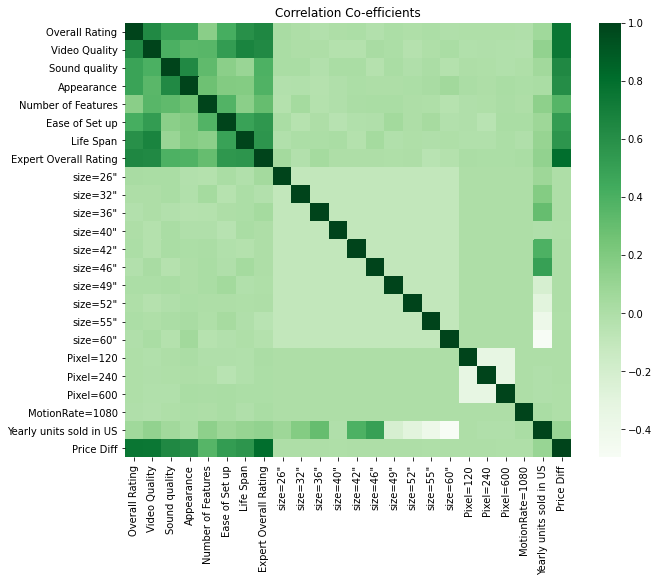

In [61]:
corr_mat = df1.corr(method='spearman')
g = sns.heatmap(corr_mat, cmap='Greens')
g.set_title("Correlation Co-efficients")
plt.show()